Task 1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
        
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights = weights/sum(weights)
bounds_w = np.cumsum(weights)
start_time = time.time()
ran_vec = np.random.rand(1000)
for i in range(len(weights)):
    ran_vec[ran_vec < bounds_w[i]] = i + 1
#ran_vec
print(" %s seconds " % (time.time() - start_time))
    

 0.0005180835723876953 seconds 


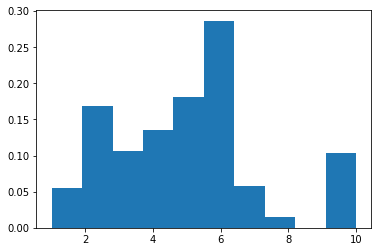

In [6]:
plt.hist(ran_vec,density=True)
plt.show()

Попробуем оптимизировать алгоритм, упорядочив веса.

In [9]:
weights = np.sort(weights)
weights = weights/sum(weights)
bounds_w = np.cumsum(weights)
start_time1 = time.time()
ran_vec = np.random.rand(1000)
for i in range(len(weights)):
    ran_vec[ran_vec < bounds_w[i]] = i + 1
#bounds_w
#ran_vec
print(" %s seconds " % (time.time() - start_time1))
    

 0.0013277530670166016 seconds 


Task 2

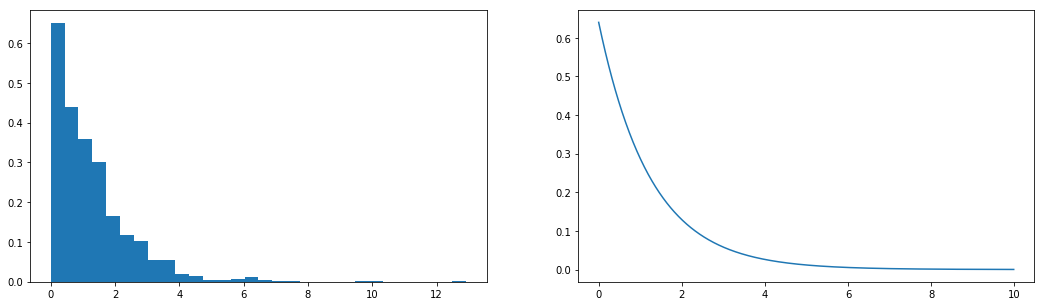

In [10]:
ran_vec = np.random.rand(1000)
const = 0.8
ran_vec = -np.log(1-ran_vec)/const

fig, ax = plt.subplots(1, 2, figsize = (18, 5))

ax[0].hist(ran_vec, density=True, bins = 30)
ax[1].plot(np.arange(1000)/100, const * np.exp(-np.arange(1000)*const/100)*const)
plt.show()

Task 3

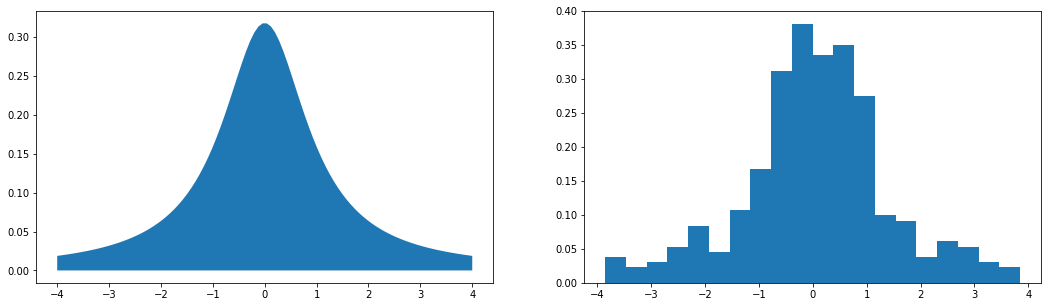

In [11]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
sample = np.array([8 * np.random.rand(1000) - 4])
check = np.random.rand(1000) / 3
cauchy = sample[(lambda x: 1 / ((x ** 2 + 1) * np.pi)) (sample) >= check]

fig, ax = plt.subplots(1, 2, figsize = (18, 5))
ax[0].fill_between(x, 0, dist.pdf(x))
ax[1].hist(cauchy, density = True, bins = 20)
plt.show()

Видим, что график выборочной гистограммы стремится к виду графика точной функции.

Task 4

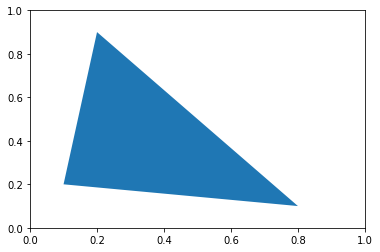

In [5]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

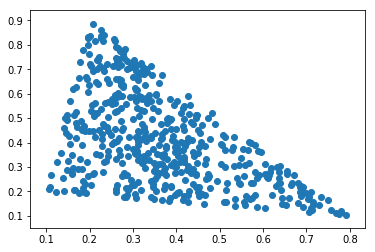

In [15]:
rand_square = np.random.rand(500, 2)

rand_triangle = rand_square[- 2 * rand_square[:, 0] + 2 > rand_square[:, 1]]
tmp_triangle = rand_square[- 2 * rand_square[:, 0] + 2 <= rand_square[:, 1]]
tmp_triangle[:, 0] = 0.5 - (tmp_triangle[:, 0] - 0.5)
tmp_triangle[:, 1] = 1 - (tmp_triangle[:, 1] - 1)
rand_triangle = np.vstack((rand_triangle, tmp_triangle))

tmp_triangle = np.array(rand_triangle)
rand_triangle[:, 0] = 7 * tmp_triangle[:, 0] + 0.5 * tmp_triangle[:, 1] + 1
rand_triangle[:, 1] = -1 * tmp_triangle[:, 0] + 3.5 * tmp_triangle[:, 1] + 2
rand_triangle = rand_triangle * 0.1

plt.scatter(rand_triangle[:, 0], rand_triangle[:, 1])

Task 5

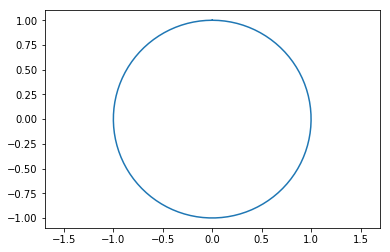

In [19]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

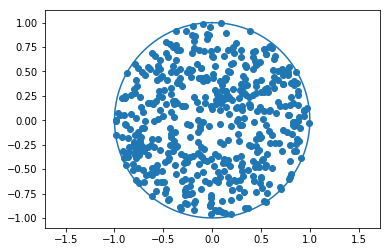

In [17]:
rand_square = np.random.rand(500, 2)

rand_square[:, 1] = rand_square[:, 1] * 2 * np.pi

rand_circle = np.array(rand_square)
rand_circle[:, 0] = np.sqrt(rand_square[:, 0]) * np.cos(rand_square[:, 1])
rand_circle[:, 1] = np.sqrt(rand_square[:, 0]) * np.sin(rand_square[:, 1])

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.scatter(rand_circle[:, 0], rand_circle[:, 1])
plt.axis('equal')
plt.show()

Task 6

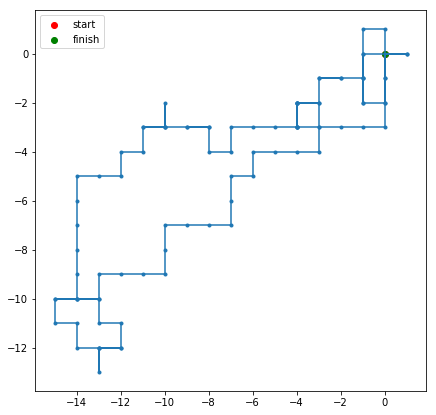

In [23]:
def dist(value):
    return np.abs(value[0]) + np.abs(value[1])

def dist_x(value):
    return np.abs(value[0])

def dist_y(value):
    return np.abs(value[1])

random_walk = np.array([[0, 0]])
n = 100
for i in range(1, n):
    tmp = np.random.rand()
    if (dist(random_walk[i - 1]) < n - i - 1):
        movement = ([-1, 0] if tmp < 0.25 else [1, 0] if tmp < 0.5 else [0, -1] if tmp < 0.75 else [0, 1])
    elif (dist_x(random_walk[i - 1]) > 0 and dist_y(random_walk[i - 1]) > 0):
        movement = ([-np.sign(random_walk[i - 1][0]), 0] if tmp < 0.5 else [0, -np.sign(random_walk[i - 1][1])])
    elif (dist_x(random_walk[i - 1]) > 0 and dist_y(random_walk[i - 1]) == 0):
        movement = [-np.sign(random_walk[i - 1][0]), 0]
    else:
        movement = [0, -np.sign(random_walk[i - 1][1])]
    value = random_walk[i - 1] + movement
    random_walk = np.vstack((random_walk, value))

plt.figure(figsize=(7, 7))
plt.plot(random_walk[:, 0], random_walk[:, 1])
plt.scatter(random_walk[:, 0], random_walk[:, 1], marker = '.')
plt.scatter(0, 0, c = 'r', marker = 'o', label = 'start')
plt.scatter(random_walk[-1, 0], random_walk[-1, 1], c = 'g', marker = 'o', label = 'finish')
plt.legend()
plt.show()